C:\Users\Claudio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


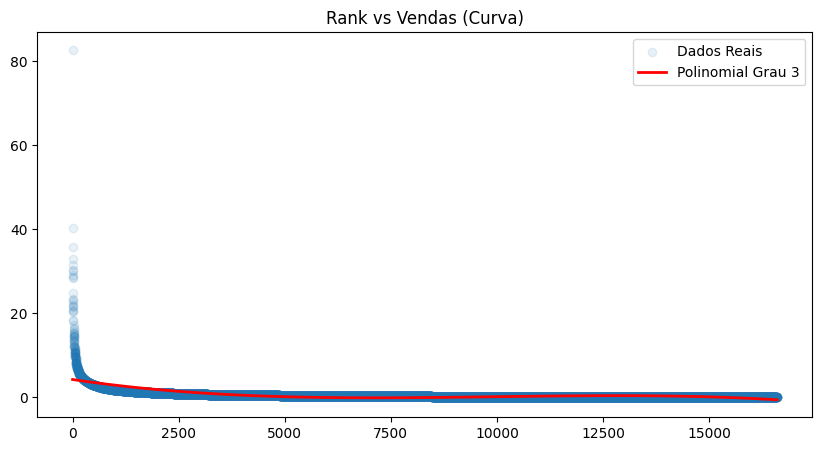

Coeficientes Lasso (zerando irrelevantes): [-1.39324902e-03  1.48703961e-07 -4.89550027e-12]


C:\Users\Claudio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:716: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+04, tolerance: 4.002e+00
  model = cd_fast.enet_coordinate_descent(


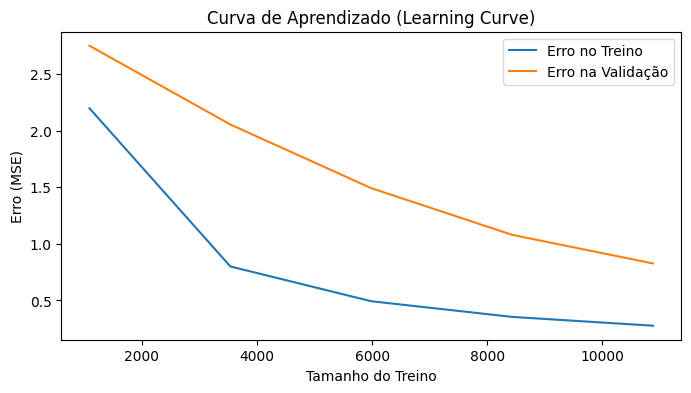

In [ ]:
# --- SEMANA 4: Curvas e Regularização (15 e 16 de Dez) ---
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import learning_curve

# Prevendo vendas globais usando Rank (posição nas vendas)
X_rank = df_cleaned[['Rank']]


# Criando curva polinomial de grau 3
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_rank)

# Treinando modelo Linear nos dados curvados
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y_sales)

# Plotando a curva prevista
X_new = np.linspace(X_rank.min(), X_rank.max(), 100).reshape(100, 1)
y_new = lin_reg_poly.predict(poly.transform(X_new))

plt.figure(figsize=(10, 5))
plt.scatter(X_rank, y_sales, alpha=0.1, label='Dados Reais')
plt.plot(X_new, y_new, "r-", linewidth=2, label="Polinomial Grau 3")
plt.title('Rank vs Vendas (Curva)')
plt.legend()
plt.show()

# Regularizando com Ridge e Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_poly, y_sales)
print("Coeficientes Lasso (zerando irrelevantes):", lasso_reg.coef_)

# 3. Curva de Aprendizado 
train_sizes, train_scores, val_scores = learning_curve(
    LinearRegression(), X_sales, y_sales, cv=3, scoring="neg_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 5)
)

# Plotando a curva de aprendizado (Média dos erros)
plt.figure(figsize=(8, 4))
plt.plot(train_sizes, -train_scores.mean(axis=1), label="Erro no Treino")
plt.plot(train_sizes, -val_scores.mean(axis=1), label="Erro na Validação")
plt.title("Curva de Aprendizado (Learning Curve)")
plt.xlabel("Tamanho do Treino")
plt.ylabel("Erro (MSE)")
plt.legend()
plt.show()

Erro Quadrático Médio (MSE): 0.28


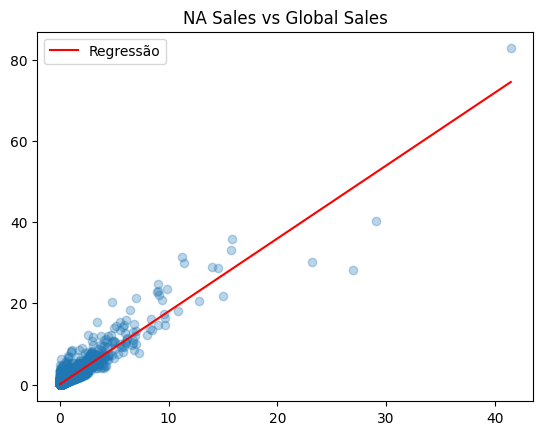

Pesos (Theta) calculados na mão: [-0.25176487  1.88760908]


In [8]:
# --- SEMANA 3: Regressão e Matemática (8 e 9 de Dez) ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prever Vendas Globais baseado em Vendas na América do Norte
X_sales = df_cleaned[['NA_Sales']]
y_sales = df_cleaned['Global_Sales']

#Regressão Linear com Scikit-Learn
lin_reg = LinearRegression()
lin_reg.fit(X_sales, y_sales)

# Calculando o Erro (MSE)
y_pred = lin_reg.predict(X_sales)
mse = mean_squared_error(y_sales, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")

# Visualizando
plt.scatter(X_sales, y_sales, alpha=0.3)
plt.plot(X_sales, y_pred, color='red', label='Regressão')
plt.title('NA Sales vs Global Sales')
plt.legend()
plt.show()

# 2. Gradiente Descendente Manual 
X_b = np.c_[np.ones((len(X_sales), 1)), X_sales] 
theta = np.random.randn(2, 1) # Pesos iniciais (aleatórios)

eta = 0.01 # Taxa de aprendizado (alterando pra um valor maior, ela pode explodir)
m = len(X_sales)

gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y_sales.values.reshape(-1, 1))
theta = theta - eta * gradients

print("Pesos (Theta) calculados na mão:", theta.ravel())

Matriz de Confusão:
 [[11435     0]
 [ 1626     0]]
Precisão: 0.00
Recall: 0.00


C:\Users\Claudio\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


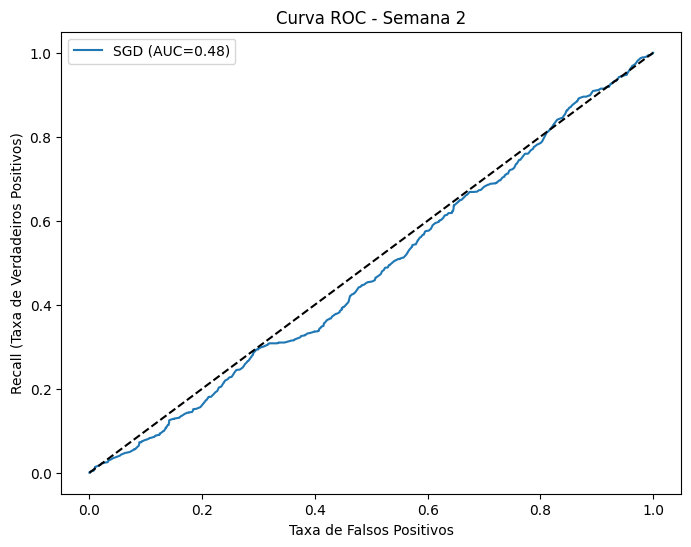

In [ ]:
# --- SEMANA 2: Avaliando os Erros (1 e 2 de Dez) ---
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

# Gerando previsões nos dados de treino para avaliar
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

# Matriz de Confusão: Ver FP e FN
print("Matriz de Confusão:\n", confusion_matrix(y_train, y_train_pred))

# Métricas de Precisão 
print(f"Precisão: {precision_score(y_train, y_train_pred):.2f}")
print(f"Recall: {recall_score(y_train, y_train_pred):.2f}")

# Curva ROC para ver o desempenho visualmente
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
auc_score = roc_auc_score(y_train, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"SGD (AUC={auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Recall (Taxa de Verdadeiros Positivos)')
plt.title('Curva ROC - Semana 2')
plt.legend()
plt.show()

In [4]:
# --- SEMANA 1: Classificação (24 e 25 de Nov) ---
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score

y = (df_cleaned['Global_Sales'] > 1.0)

le = LabelEncoder()
df_cleaned['Platform_Code'] = le.fit_transform(df_cleaned['Platform'])
df_cleaned['Genre_Code'] = le.fit_transform(df_cleaned['Genre'])

X = df_cleaned[['Platform_Code', 'Genre_Code']]

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
print(f"Acurácia média da Semana 1: {scores.mean():.2f}")

Acurácia média da Semana 1: 0.88


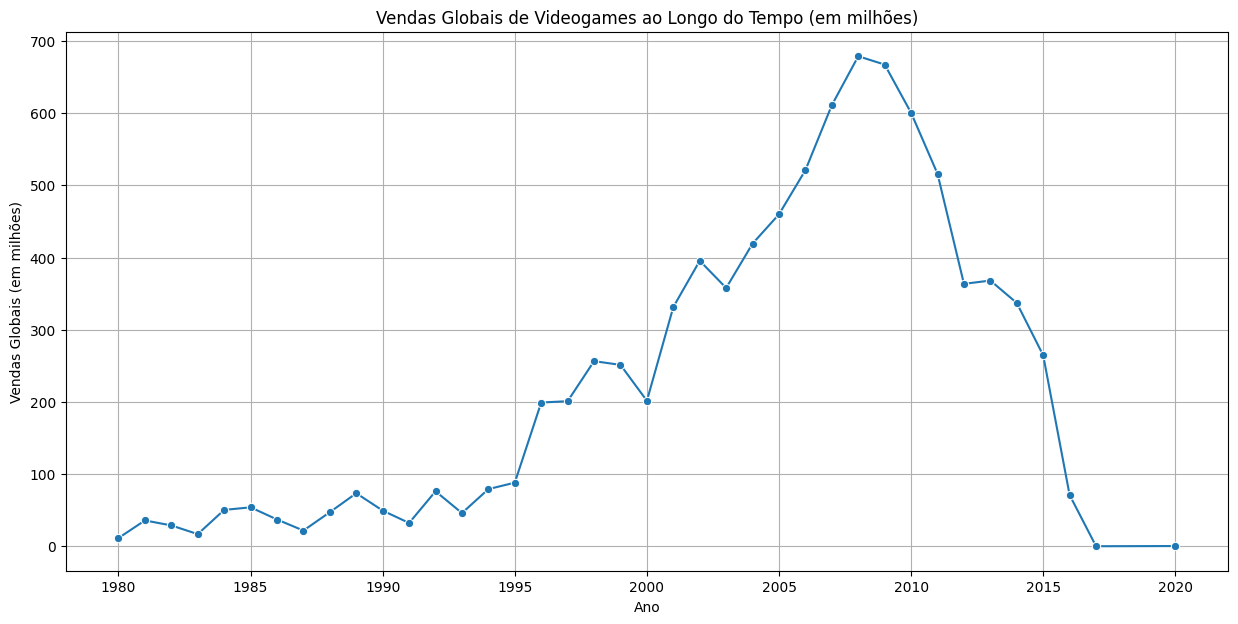

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Conceito do Livro: "Descubra e Visualize os Dados para Obter Informações".
# Checklist: Item 3, "Descubrir e visualizar os dados...".
# O livro explica que plotar os dados é a melhor forma de obter informações e detectar padrões.
# Aqui, estamos criando um gráfico de linhas (line plot) para visualizar a tendência das vendas ao longo do tempo. 
# Isso nos permite identificar padrões como o "pico" das vendas e eventuais quedas.

# Define o tamanho do gráfico
plt.figure(figsize=(15, 7))

# Cria o gráfico de linhas
sns.lineplot(x='Year', y='Global_Sales', data=sales_per_year, marker='o')

# Adiciona um título e rótulos aos eixos
plt.title('Vendas Globais de Videogames ao Longo do Tempo (em milhões)')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais (em milhões)')
plt.grid(True) 
plt.show()

In [16]:
# Checklist: Item 4, "Preparar os dados...".
# Aqui, vou transformar os dados para a visualização.
# O livro ensina que é importante criar atributos mais úteis.
# Em vez de olhar milhares de jogos individuais, vou agregar (somar) todas as vendas globais por ano. 
# O 'groupby' é uma técnica fundamental de preparação para esse tipo de análise.

sales_per_year = df_cleaned.groupby('Year')['Global_Sales'].sum().reset_index()

print("Dados agregados prontos para o gráfico:")
print(sales_per_year.head())

Dados agregados prontos para o gráfico:
   Year  Global_Sales
0  1980         11.38
1  1981         35.77
2  1982         28.86
3  1983         16.79
4  1984         50.36


In [15]:
# dropna() remove as linhas que contêm valores NaN na coluna 'Year'
# Adicionamos .copy() para garantir que estamos trabalhando em uma cópia nova
df_cleaned = df.dropna(subset=['Year']).copy()

# tratando a coluna 'Year' de float (ex: 2009.0) para int (ex: 2009)
df_cleaned['Year'] = df_cleaned['Year'].astype(int)

print("Limpeza dos dados 'Year' limpos e convertidos para inteiro.")
print(df_cleaned[['Year', 'Global_Sales']].head())

Limpeza dos dados 'Year' limpos e convertidos para inteiro.
   Year  Global_Sales
0  2006         82.74
1  1985         40.24
2  2008         35.82
3  2009         33.00
4  1996         31.37


In [11]:
print("--- Gêneros Mais Comuns ---")
print(df['Genre'].value_counts())
print("\n--- Plataformas Mais Comuns ---")
print(df['Platform'].value_counts())

--- Gêneros Mais Comuns ---
Genre
Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: count, dtype: int64

--- Plataformas Mais Comuns ---
Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64


In [12]:
#comando para ver as estatísticas descritivas do dataset
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [13]:
#comando para ver as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [2]:
# Importando as bibliotecas básicas e carregando os dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vgsales.csv')

df_cleaned = df.dropna(subset=['Year']).copy()
print("Dados carregados! Pronto para começar.")

Dados carregados! Pronto para começar.
